# Sales Data Analysis of Chocolate Sales

## 1. Introduction

## 2. Data loading and first look

In [1]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
path = kagglehub.dataset_download("atharvasoundankar/chocolate-sales")
csv_path = os.path.join(path, "Chocolate Sales.csv")

df = pd.read_csv(csv_path)
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


We will see a basic information about the dataset, to look for any anomalies or missing values.

In [3]:
print(f"rows: {df.shape[0]}, columns: {df.shape[1]}")
df.info()

rows: 1094, columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


Check possible NaNs

In [4]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

print("Date range:", df["Date"].min(), "->", df["Date"].max())

Date range: 2022-01-03 00:00:00 -> 2022-08-31 00:00:00


/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/4151490514.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
duplicates = df.duplicated()
print(f"duplicated rows: {duplicates.sum()}")

duplicated rows: 0


We can see that this dataset is so clean, that will make our life easier.

## 3. Cleaning the data

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184


In [8]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = df["amount"].replace(r"[\$,]", "", regex=True).astype(float)

df.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


## 4. Exploratory data analysis (EDA)

I think that in business intelligence, the most important thing is to understand the data and the business. So, I will try to make some analysis that can be useful for a business.

I will explain the analysis answering four basic questions:
1. Which are the most sold chocolates?
2. Where are the most sold chocolates?
3. When are the most sold chocolates?
4. How are the most sold chocolates?

It is a subjective decission, but for a first analysis I think that will be far enough to understand the data and the business.

### 4.1. WHICH is the best-selling chocolate?

/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/2345271493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="viridis")


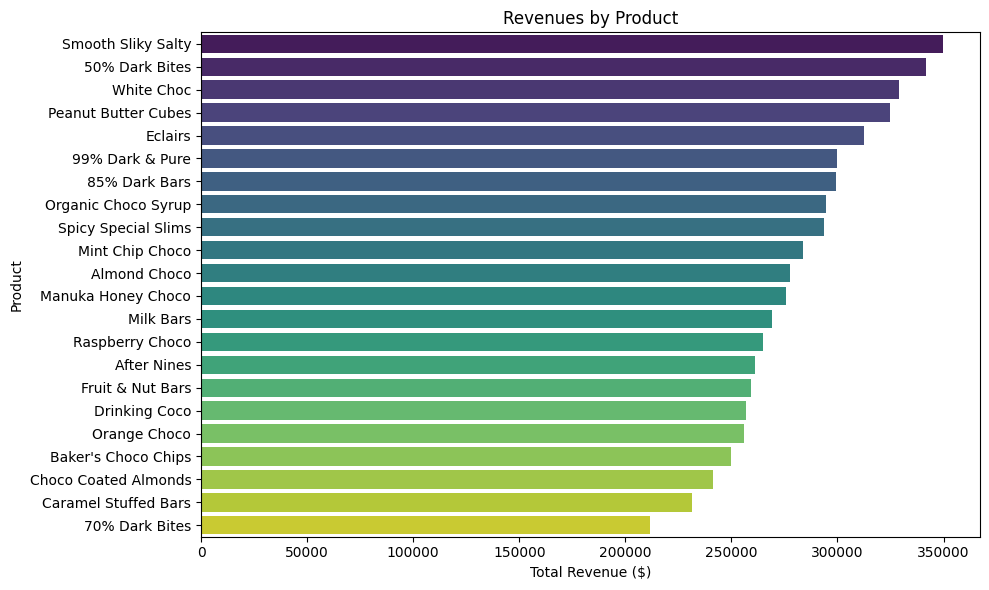

In [9]:
product_revenue = df.groupby('product')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="viridis")
plt.title("Revenues by Product")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

### 4.2. WHERE is selling the most chocolate?

/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/248236132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")


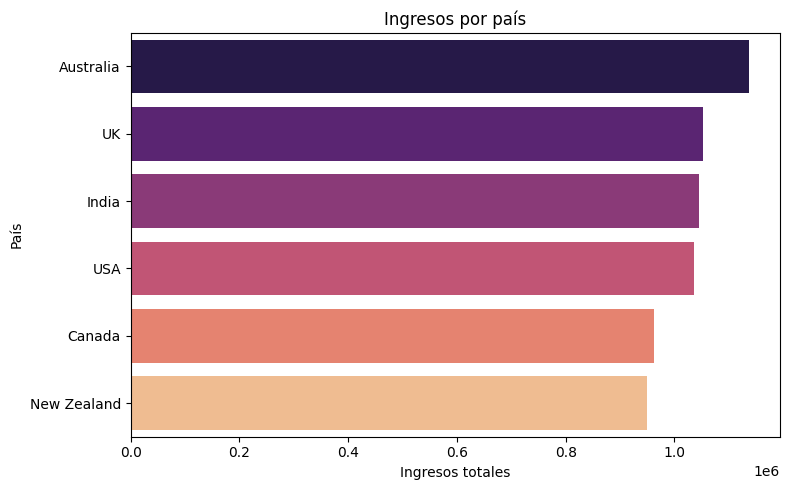

In [10]:
country_revenue = df.groupby('country')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")
plt.title("Ingresos por país")
plt.xlabel("Ingresos totales")
plt.ylabel("País")
plt.tight_layout()
plt.show()

In [11]:
# Convert country_revenue to a DataFrame
country_revenue_df = country_revenue.reset_index()
country_revenue_df.columns = ['country', 'total_revenue']

# Create a map
fig = px.choropleth(
    country_revenue_df,
    locations="country",
    locationmode="country names",
    color="total_revenue",
    color_continuous_scale=px.colors.sequential.Viridis[::-1],
    title="Revenues by Country",
    labels={"total_revenue": "Total Revenue ($)"},
)

fig.update_layout(geo=dict(showframe=False, projection_type="natural earth"))
fig.show()

### 4.3. WHEN is selling the most chocolate?

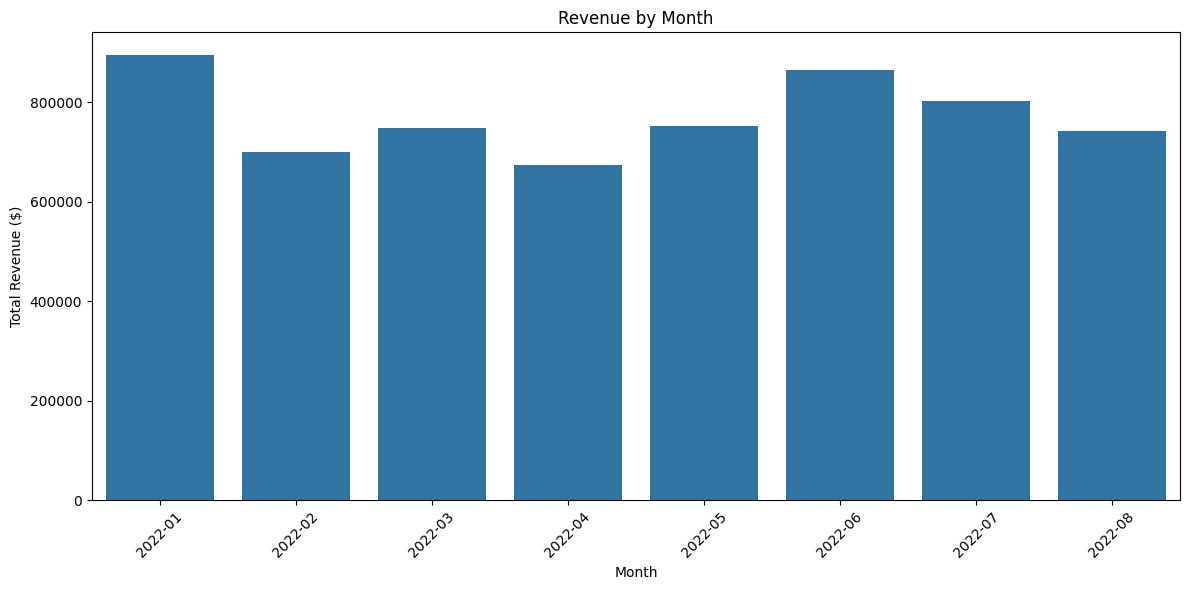

In [12]:
df['month'] = df['date'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('month')['amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='amount', data=monthly_revenue)
plt.xticks(rotation=45)
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()

### 4.4. HOW is selling the most chocolate?

As we could see, our dataset hasn't lot of columns, so is complicated to extract rigorous conclusions. But I conclude that it's possible to know the behavior of th sales with a perspective of volume and segmentation.

In [13]:
df['price_per_box'] = df['amount'] / df['boxes_shipped']
df.head()

,sales_person,country,product,date,amount,boxes_shipped,month,price_per_box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02,74.375000


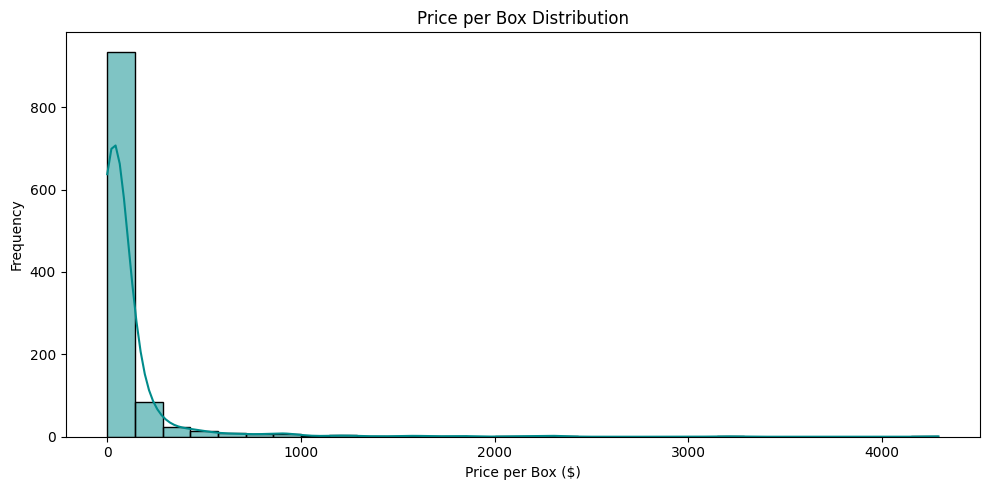

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_box'], bins=30, kde=True, color='darkcyan')
plt.title("Price per Box Distribution")
plt.xlabel("Price per Box ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

segmentation

In [15]:
df['order_size'] = pd.cut(
    df['boxes_shipped'],
    bins=[0, 10, 50, df['boxes_shipped'].max()],
    labels=['small', 'medium', 'large']
)
df.head()

,sales_person,country,product,date,amount,boxes_shipped,month,price_per_box,order_size
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01,29.555556,large
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08,84.000000,large
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07,49.461538,large
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04,37.210526,large
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02,74.375000,large


In [16]:
segment_stats = df.groupby("order_size").agg({
    "amount": ["sum", "mean"],
    "price_per_box": "mean",
    "boxes_shipped": "mean"
}).round(2)

segment_stats

/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/3105552569.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



amount          price_per_box boxes_shipped
                  sum     mean          mean          mean
order_size                                                
small        182385.0  5526.82        1186.4          5.91
medium       950873.0  6056.52         250.1         30.34
large       5050367.0  5586.69          41.2        190.32

In [17]:
segment_stats.columns = ['total_revenue', 'avg_revenue', 'avg_price_per_box', 'avg_boxes']
segment_stats.reset_index(inplace=True)
segment_stats

,order_size,total_revenue,avg_revenue,avg_price_per_box,avg_boxes
0,small,182385.0,5526.82,1186.4,5.91
1,medium,950873.0,6056.52,250.1,30.34
2,large,5050367.0,5586.69,41.2,190.32


/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/3601511326.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/3601511326.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




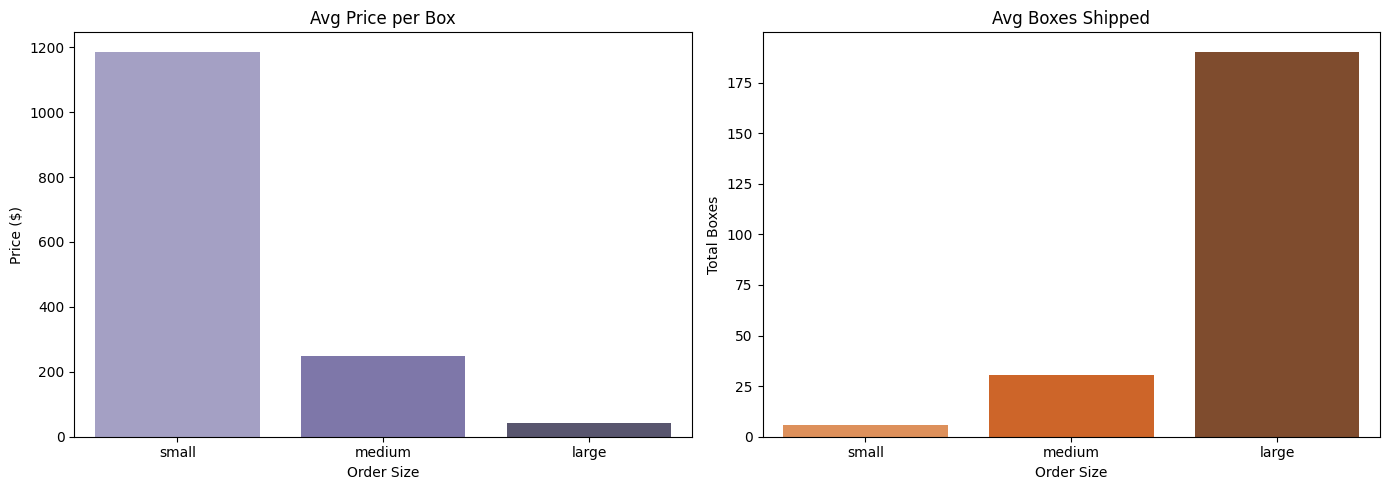

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=segment_stats, x='order_size', y='avg_price_per_box', ax=ax[0], palette='Purples_d')
ax[0].set_title("Avg Price per Box")
ax[0].set_xlabel("Order Size")
ax[0].set_ylabel("Price ($)")

sns.barplot(data=segment_stats, x='order_size', y='avg_boxes', ax=ax[1], palette='Oranges_d')
ax[1].set_title("Avg Boxes Shipped")
ax[1].set_xlabel("Order Size")
ax[1].set_ylabel("Total Boxes")

plt.tight_layout()
plt.show()

## 5. Conclusion

In [ ]:
segment_stats["revenue_per_box"] = segment_stats["avg_revenue"] / segment_stats["avg_boxes"]

/var/folders/6h/f4b9pqr55319d7smk2pl0wdw0000gn/T/ipykernel_11810/1379135219.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




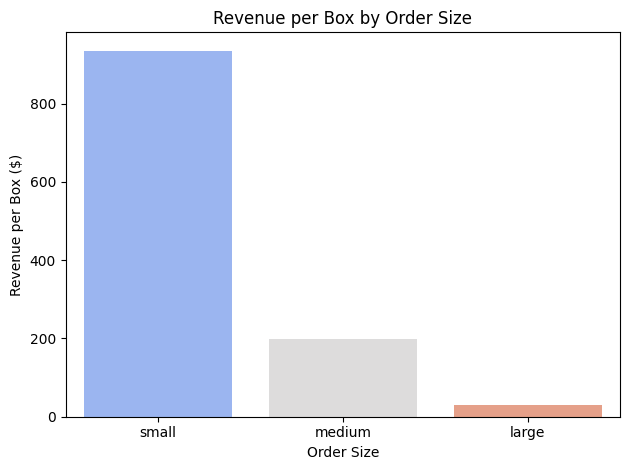

In [ ]:
sns.barplot(data=segment_stats, x="order_size", y="revenue_per_box", hue="order_size", palette="coolwarm")
plt.title("Revenue per Box by Order Size")
plt.ylabel("Revenue per Box ($)")
plt.xlabel("Order Size")
plt.tight_layout()
plt.show()

It's clear that these market is price scaled-based. Small orders are more expensive than big orders but which profit is higher? I think that is a good question to ask. 

But this calculus of costs is so basic. Moreover is a simulation, we can do it better including the costs of the chocolate, the taxes and the logistics. Is not 100% accurate, but is a good approximation to understand the behavior of the sales.

In [21]:
def calculate_cost_row(row):
    # Static costs
    chocolate_cost = 12 * row["boxes_shipped"]
    tax_cost = 0.10 * row["amount"]

    # Variable costs
    if row["boxes_shipped"] <= 6: # Small
        logistic_cost_box = 5
    elif row["boxes_shipped"] <= 30: # Medium
        logistic_cost_box = 3
    else:
        logistic_cost_box = 1.5 # Large

    logistic_cost = logistic_cost_box * row["boxes_shipped"]

    # Total cost
    total_cost = chocolate_cost + tax_cost + logistic_cost
    return chocolate_cost, tax_cost, logistic_cost, total_cost

In [22]:
df.head()

,sales_person,country,product,date,amount,boxes_shipped,month,price_per_box,order_size
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01,29.555556,large
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08,84.000000,large
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07,49.461538,large
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04,37.210526,large
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02,74.375000,large


In [ ]:
df[["chocolate_cost", "tax_cost", "logistic_cost", "cost"]] = df.apply(calculate_cost_row, axis=1, result_type="expand")
df["profit"] = df["amount"] - df["cost"]
df["profit_margin"] = (df["profit"] / df["amount"]) * 100

df.head()

,sales_person,country,product,date,amount,boxes_shipped,month,price_per_box,order_size,chocolate_cost,tax_cost,logistic_cost,cost,profit,profit_margin
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01,29.555556,large,2160.0,532.0,270.0,2962.0,2358.0,44.323308
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08,84.000000,large,1128.0,789.6,141.0,2058.6,5837.4,73.928571
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07,49.461538,large,1092.0,450.1,136.5,1678.6,2822.4,62.706065
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04,37.210526,large,4104.0,1272.6,513.0,5889.6,6836.4,53.719943
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02,74.375000,large,2208.0,1368.5,276.0,3852.5,9832.5,71.848739


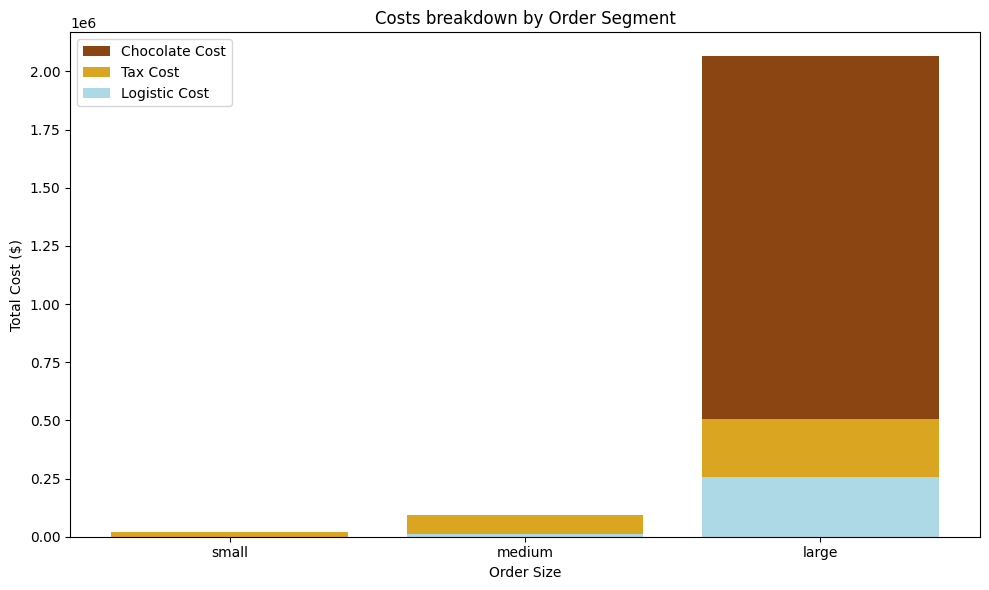

In [29]:
segmented_costs = df.groupby("order_size", observed=True)[["chocolate_cost", "tax_cost", "logistic_cost", "cost"]].sum().reset_index()

labels = segmented_costs["order_size"]
chocolate = segmented_costs["chocolate_cost"]
tax = segmented_costs["tax_cost"]
logistic = segmented_costs["logistic_cost"]

plt.figure(figsize=(10, 6))
plt.bar(labels, chocolate, label="Chocolate Cost", color="saddlebrown")
plt.bar(labels, tax, label="Tax Cost", color="goldenrod")
plt.bar(labels, logistic, label="Logistic Cost", color="lightblue")

plt.title("Costs breakdown by Order Segment")
plt.xlabel("Order Size")
plt.ylabel("Total Cost ($)")
plt.legend()
plt.tight_layout()
plt.show()

benefits

In [28]:
benefits = df.groupby("order_size", observed=True).agg({"amount": "sum", "cost": "sum", "profit": "sum"}).round(2)

benefits["profit_margin"] = (benefits["profit"] / benefits["amount"]) * 100
benefits = benefits.round(2)
benefits

,amount,cost,profit,profit_margin
order_size,,,,
small,182385.0,21305.5,161079.5,88.32
medium,950873.0,162030.8,788842.2,82.96
large,5050367.0,2827684.7,2222682.3,44.01


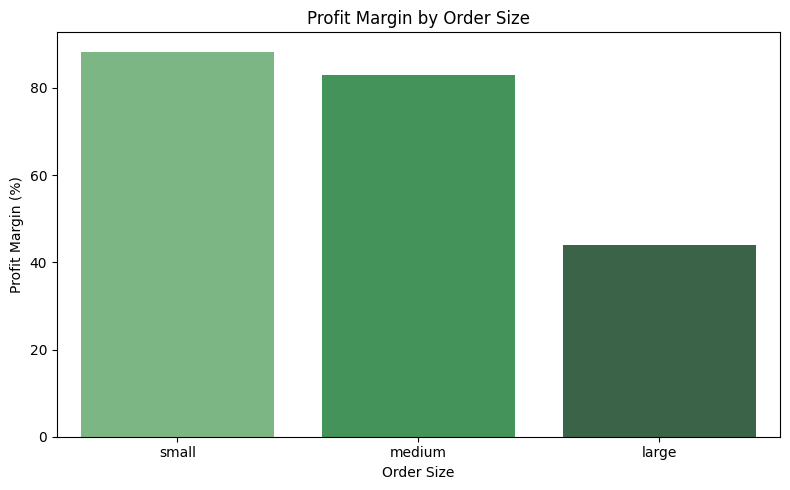

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=benefits, x="order_size", y="profit_margin", hue="order_size", palette="Greens_d")
plt.title("Profit Margin by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Profit Margin (%)")
plt.tight_layout()
plt.show()

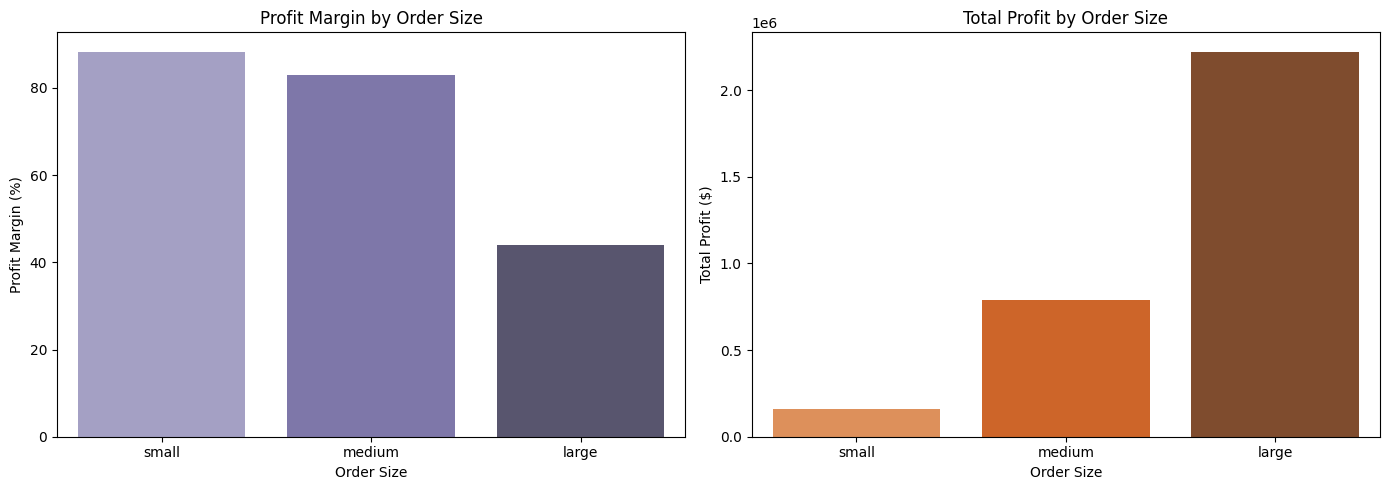

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=benefits, x="order_size", y="profit_margin", ax=ax[0], hue="order_size", palette="Purples_d")
ax[0].set_title("Profit Margin by Order Size")
ax[0].set_xlabel("Order Size")
ax[0].set_ylabel("Profit Margin (%)")

sns.barplot(data=benefits, x="order_size", y="profit", ax=ax[1], hue="order_size", palette="Oranges_d")
ax[1].set_title("Total Profit by Order Size")
ax[1].set_xlabel("Order Size")
ax[1].set_ylabel("Total Profit ($)")

plt.tight_layout()
plt.show()

## 📌 Final Insights: Profitability by Order Size

Based on the analysis of profit margin and total profit across different order sizes, the following conclusions can be drawn:

### 1. **High Unit Profitability in Small Orders vs. High Volume Profit in Large Orders**

Small orders yield the highest **profit margin**, exceeding **85%**, followed closely by medium orders at around **80%**. In contrast, large orders show a significantly lower margin (around **45%**), yet they generate the highest **total profit**, surpassing **$2 million**.

> 🧠 **Interpretation**:  
> Small orders are more profitable **per dollar sold**, but large orders are more profitable **in absolute terms** due to their scale.

### 2. **Strategic Trade-off: Margin vs. Volume**

This result reveals a classic **business trade-off**:
- Smaller orders = **higher margins** but lower volume  
- Larger orders = **lower margins** but **much higher profit volume**

> 🏢 **Strategic Implication**:  
> If the business aims to **maximize profitability per unit**, targeting small or medium orders may be ideal — such as individual or boutique clients.  
> However, if the goal is to **maximize total profit**, then focusing on large-scale orders remains the most effective path.

### 3. **Optimization Potential**

A hybrid strategy could offer the best outcome:
- **Maintain premium pricing** for small orders (justified by convenience, branding, or packaging)
- **Reduce cost structures** (especially logistics and tax optimization) in large orders to recover margins while maintaining volume.

# 6. Extra section: Interesting facts

Finishing my prevoius analysis, I had some questions as WHO is the sales person that sells more large orders? Because we saw that these orders made more money. So, for me is also interesting who is selling more but also who is selling better.